### Import any necessary libraries

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib sklearn

'c:\users\zafar' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [4]:
# Load in data.
df = pd.read_csv('creditcard.csv')

# Removing this column/feature from the data.
del df['Time']

#Extract x and y data.
X = df.loc[:, df.columns != 'Class'] 
y = df['Class']

In [5]:
# Determine number of not fraud (0) and fraud cases (1).
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Display some of the data for visualization purposes.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Making sure there is no null data in our dataset, which it turns out isn't the case, because you can see for every column the number of non-null rows is equal to the total number of rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [8]:
# Display some general statistics on the data.
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Computes performance metrics based on given inputs.
def compute_performance(yhat, y, classes):
    # Sum true positive (tp), true negative(tn),
    # false positive (fp), false negative (fn).
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for pre, true in zip(yhat,y):
        if(pred == true):
            if(pred == clases[1]):
                tp +=1
            else:
                tn +-1
        else:
            if(pred == clases[1]):
                fp +=1
            else:
                fn +=1
    
    # Compute accuracy.
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Compute precision.
    precision = tp / (tp + fp)

    # Compute recall.
    recall = tp / (tp + fn)    
    
    # compute F1 score.
    f_score = 2 * (precision * recall) / (precision + recall)
    
    # Return performance metrics.
    return acc, recall, precision, f_score

In [10]:
pipeline_dict = {
    'lr_none': Pipeline([
        ('logistic_regression', LogisticRegression(penalty='none', max_iter=100000000000000))
    ]),
    'pr_2_lr_none': Pipeline([
        ('polynomial_features', PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)), 
        ('logistic_regression', LogisticRegression(penalty='none', max_iter=100000000000000000))
    ]),
    'rf': Pipeline([
        ('random_forest', RandomForestClassifier())
    ]),
    'rbf_svc_C100': Pipeline([
        ('rbf_svc',SVC(kernel='rbf',C = 100))
    ]),
    'poly_svc_degree1': Pipeline([
        ('poly_svc',SVC(kernel='poly',degree = 1))
    ]),
    'lr_L1_lam10': Pipeline([
        ('logistic_regression',LogisticRegression(penalty='l1', C=10, solver='liblinear', max_iter=1000000000))
    ]),
    'lr_L2_lam1': Pipeline([
        ('logistic_regression',LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=1000000000))])
}

In [11]:
# Performs 5-fold cross validation with the help of compute_performance,
# then prints the results.
def report_performance(algorithm_name):
    kf = KFold(n_splits=5, shuffle=True)

    acc_list = list()
    recall_list = list()
    precision_list = list()
    f_score_list = list()
    
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]

        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        model = pipeline_dict[algorithm_name]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc, recall, precision, f_score = compute_performance(y_pred, y_test, model.classes_)

        acc_list.append(acc)
        recall_list.append(recall)
        precision_list.append(precision)
        f_score_list.append(f_score)
     

    print("\tAccuracy:",round(np.mean(acc_list),3),"\n\tRecall:",round(np.mean(recall_list),3),"\n\tPrecision:",round(np.mean(precision_list),3),"\n\tF-Score:",round(np.mean(f_score_list),3), "\n")


### Logistic Regression (No Regularization)

In [12]:
# Compute general performance (using 5 fold cross validation ) of Logistic Regression (No Regularization).
print('Logistic Regression (No Regularization)')
report_performance('lr_none')

Logistic Regression (No Regularization)
	Accuracy: 0.999 
	Recall: 0.626 
	Precision: 0.872 
	F-Score: 0.728 



### 2nd Degree Polynomial Logistic Regression (No Regularization) 

In [13]:
# Compute general performance (using 5 fold cross validation ) of Logistic Regression
# with 2nd Order Polynomial Degree (No Regularization).
print('Polynomial Order 2 Logistic Regression (No Regularization)')
report_performance('pr_2_lr_none')

Polynomial Order 2 Logistic Regression (No Regularization)


c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

	Accuracy: 0.999 
	Recall: 0.619 
	Precision: 0.806 
	F-Score: 0.697 



c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### We tried Polynomial Logistic Regression, seeing if having the degree of polynomial as 2 improved the model significantly. However, the results show the performance actually decreased for all the metrics, So we decided not to generate polynomial features for our project.

## Regularization

In [14]:
# List to hold regularization parameters that will be used.
reg_param_list = [0.01, 0.1, 1, 10, 100, 1000]

### Logistic Regression (L1 Regularization)

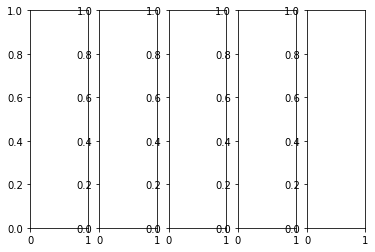

In [15]:
fig, ax = plt.subplots(ncols=5)

In [16]:
# Finding best regularization parameter (C) by trying different values and doing 5-fold
# cross validation on each try.
precision_list = list()
recall_list = list()
f1_list = list()
accuracy_list = list()

scoring = ['precision', 'recall', 'f1', 'accuracy']

for reg_param in reg_param_list:
    model = LogisticRegression(penalty='l1', C=(1/reg_param), solver='liblinear', max_iter=100000)
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    precision_list.append(np.mean(scores['test_precision']))
    recall_list.append(np.mean(scores['test_recall']))
    f1_list.append(np.mean(scores['test_f1']))
    accuracy_list.append(np.mean(scores['test_accuracy']))

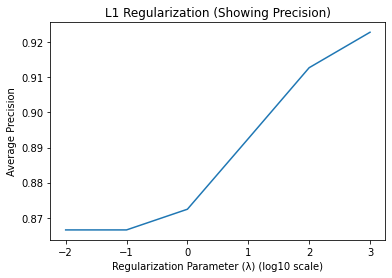

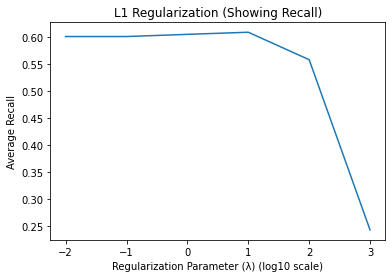

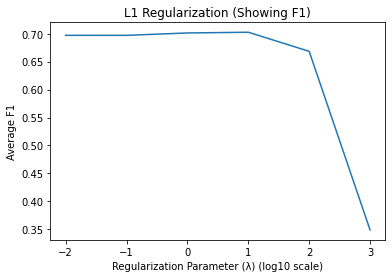

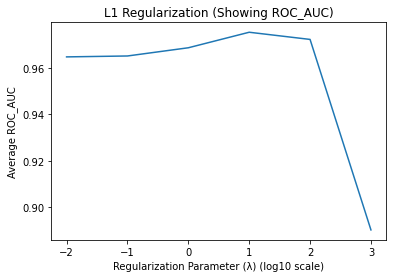

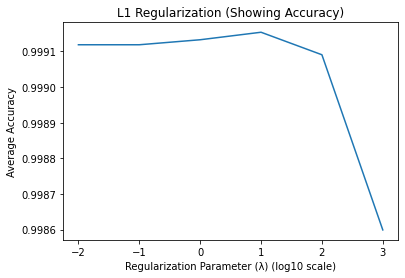

In [17]:
# Plotting performance metrics for results of previous calculation.
plt.plot(np.log10(reg_param_list), precision_list)
plt.title('L1 Regularization (Showing Precision)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Precision")

plt.show()

plt.plot(np.log10(reg_param_list), recall_list)
plt.title('L1 Regularization (Showing Recall)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Recall")

plt.show()

plt.plot(np.log10(reg_param_list), f1_list)
plt.title('L1 Regularization (Showing F1)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average F1")

plt.show()

plt.plot(np.log10(reg_param_list), accuracy_list)
plt.title('L1 Regularization (Showing Accuracy)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Accuracy")

plt.show()

#### Best Lambda for L1 Logistic Regression was found to be 10, determine general performance using 5 fold cross validation

In [18]:
# Compute general performance (using 5 fold cross validation ) of Logistic Regression 
# (L1 Regularization with Lambda equal to 10).
print('Logistic Regression (L1 Regularization w/ Lambda = 10)')
report_performance('lr_L1_lam10')

Logistic Regression (L1 Regularization w/ Lambda = 10)
	Accuracy: 0.999 
	Recall: 0.62 
	Precision: 0.869 
	F-Score: 0.723 



### Logistic Regression (L2 Regularization)

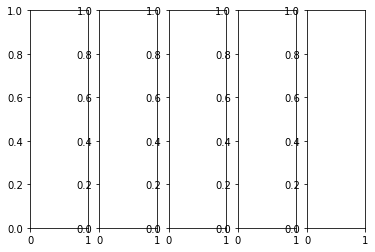

In [19]:
fig, ax = plt.subplots(ncols=5)

In [20]:
#Finding best regularization parameter (C) by trying different values and doing
# 5-fold cross validation on each try.
precision_list = list()
recall_list = list()
f1_list = list()
accuracy_list = list()

scoring = ['precision', 'recall', 'f1', 'accuracy']

for reg_param in reg_param_list:
    model = LogisticRegression(penalty='l2', C=(1/reg_param), max_iter=100000)
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    precision_list.append(np.mean(scores['test_precision']))
    recall_list.append(np.mean(scores['test_recall']))
    f1_list.append(np.mean(scores['test_f1']))
    accuracy_list.append(np.mean(scores['test_accuracy']))

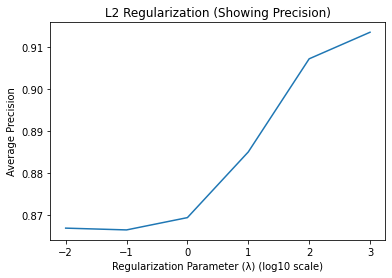

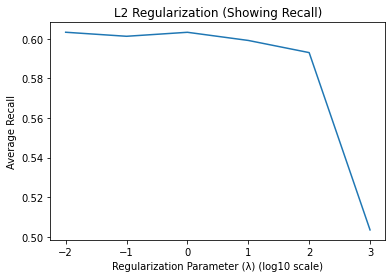

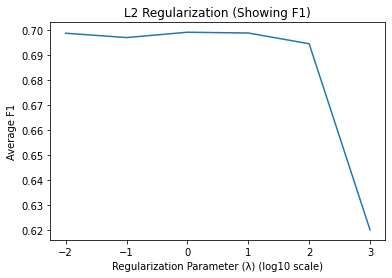

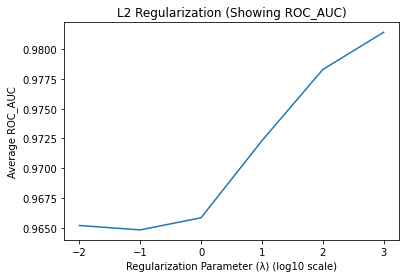

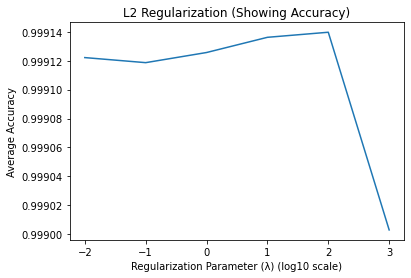

In [21]:
# Plotting performance metrics for results of previous calculation.
plt.plot(np.log10(reg_param_list), precision_list)
plt.title('L2 Regularization (Showing Precision)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Precision")

plt.show()

plt.plot(np.log10(reg_param_list), recall_list)
plt.title('L2 Regularization (Showing Recall)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Recall")

plt.show()

plt.plot(np.log10(reg_param_list), f1_list)
plt.title('L2 Regularization (Showing F1)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average F1")

plt.show()

plt.plot(np.log10(reg_param_list), accuracy_list)
plt.title('L2 Regularization (Showing Accuracy)')
plt.xlabel("Regularization Parameter (λ) (log10 scale)")
plt.ylabel("Average Accuracy")

plt.show()

#### Best Lambda for L2 Logistic Regression was found to be 1, determine general performance using 5 fold cross validation

In [22]:
# Compute general performance (using 5 fold cross validation ) of Logistic Regression 
# (L2 Regularization with Lambda equal to 1).
print('Logistic Regression (L2 Regularization w/ Lambda = 1)')
report_performance('lr_L2_lam1')

Logistic Regression (L2 Regularization w/ Lambda = 1)
	Accuracy: 0.999 
	Recall: 0.62 
	Precision: 0.869 
	F-Score: 0.723 



### Random Forest

In [32]:
# Compute general performance (using 5 fold cross validation ) of Random Forest with default parameters.
print('Random Forest (Default Parameters)')
report_performance('rf')

Random Forest (Default Parameters)
	Accuracy: 1.0 
	Recall: 0.786 
	Precision: 0.948 
	F-Score: 0.859 



### SVM Gaussian

In [27]:
# Finding best regularization parameter (C) by trying different values and doing 5-fold cross validation on each try.
precision_list = list()
recall_list = list()
f1_list = list()
accuracy_list = list()

scoring = ['precision', 'recall', 'f1', 'accuracy']
reg_param_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for reg_param in reg_param_list:
    model = SVC(kernel='rbf', C=reg_param)
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    precision_list.append(np.mean(scores['test_precision']))
    recall_list.append(np.mean(scores['test_recall']))
    f1_list.append(np.mean(scores['test_f1']))
    accuracy_list.append(np.mean(scores['test_accuracy']))

c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\z

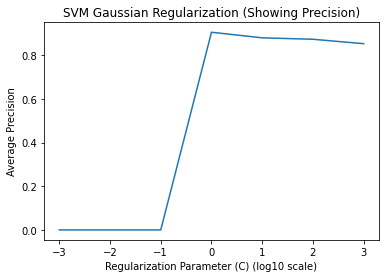

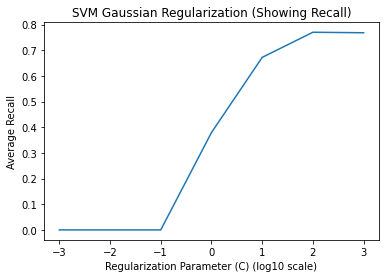

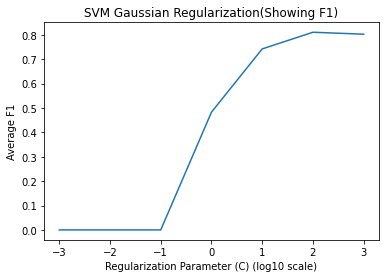

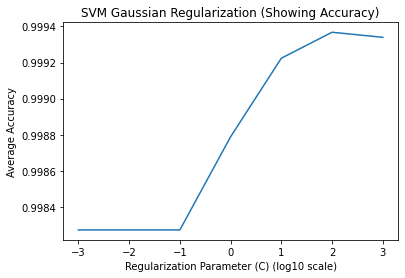

In [29]:
# Plotting performance metrics for results of previous calculation.
plt.plot(np.log10(reg_param_list), precision_list)
plt.title('SVM Gaussian Regularization (Showing Precision)')
plt.xlabel("Regularization Parameter (C) (log10 scale)")
plt.ylabel("Average Precision")

plt.show()

plt.plot(np.log10(reg_param_list), recall_list)
plt.title('SVM Gaussian Regularization (Showing Recall)')
plt.xlabel("Regularization Parameter (C) (log10 scale)")
plt.ylabel("Average Recall")

plt.show()

plt.plot(np.log10(reg_param_list), f1_list)
plt.title('SVM Gaussian Regularization(Showing F1)')
plt.xlabel("Regularization Parameter (C) (log10 scale)")
plt.ylabel("Average F1")

plt.show()

plt.plot(np.log10(reg_param_list), accuracy_list)
plt.title('SVM Gaussian Regularization (Showing Accuracy)')
plt.xlabel("Regularization Parameter (C) (log10 scale)")
plt.ylabel("Average Accuracy")

plt.show()

#### Best Gaussian SVM performance was found to be C = 100, Determine Performance using 5-Fold Cross Validation

In [31]:
# Compute general performance (using 5 fold cross validation ) of Gaussian SVM (Regularized with C = 100).
print('Gaussian SVM (Regularization Parameter C = 100)')
report_performance('rbf_svc_C100')

Gaussian SVM (Regularization Parameter C = 100)
	Accuracy: 0.999 
	Recall: 0.776 
	Precision: 0.848 
	F-Score: 0.809 



### Polynomial SVM

In [24]:
# Plotting Poly SVM performance between linear and quadratic degree (hyperparameter is degree here).
precision_list = list()
recall_list = list()
f1_list = list()
accuracy_list = list()

scoring = ['precision', 'recall', 'f1', 'accuracy']
degree_list = [1,2]

for deg_param in degree_list:
    model = SVC(kernel='poly',degree = deg_param)
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    precision_list.append(np.mean(scores['test_precision']))
    recall_list.append(np.mean(scores['test_recall']))
    f1_list.append(np.mean(scores['test_f1']))
    accuracy_list.append(np.mean(scores['test_accuracy']))
    

c:\users\zafar family\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


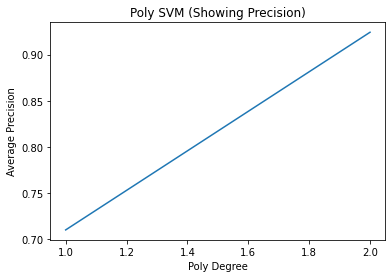

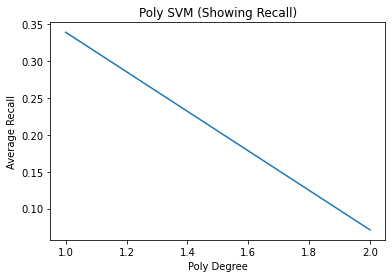

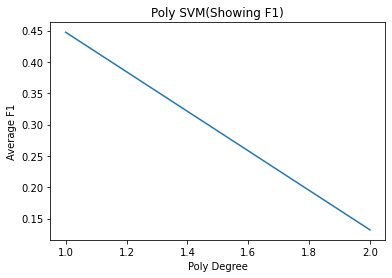

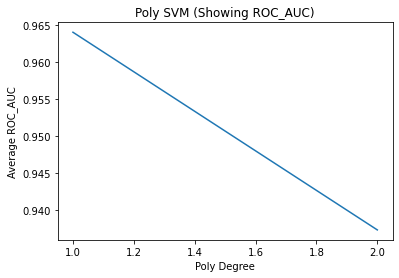

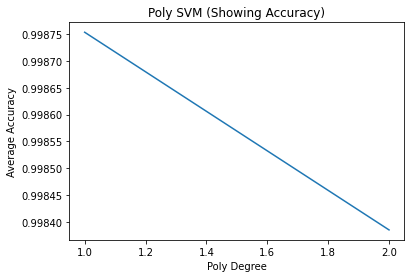

In [25]:
# Plotting performance metrics for results of previous calculation.
plt.plot(degree_list, precision_list)
plt.title('Poly SVM (Showing Precision)')
plt.xlabel("Poly Degree")
plt.ylabel("Average Precision")

plt.show()

plt.plot(degree_list, recall_list)
plt.title('Poly SVM (Showing Recall)')
plt.xlabel("Poly Degree")
plt.ylabel("Average Recall")

plt.show()

plt.plot(degree_list, f1_list)
plt.title('Poly SVM(Showing F1)')
plt.xlabel("Poly Degree")
plt.ylabel("Average F1")

plt.show()

plt.plot(degree_list, accuracy_list)
plt.title('Poly SVM (Showing Accuracy)')
plt.xlabel("Poly Degree")
plt.ylabel("Average Accuracy")

plt.show()

### Oddly polynomial degree 1 SVM performed better than degree 2. Degree 3 was not pursued due to the computational time required.

In [26]:
# Compute general performance (using 5 fold cross validation ) of Polynomial SVM (Polynomial Degree equal to 1).
print('Poly SVM (Degree 1)')
report_performance('poly_svc_degree1')

Poly SVM (Degree 1)
	Accuracy: 0.999 
	Recall: 0.331 
	Precision: 0.814 
	F-Score: 0.469 

